In [1]:
import pandas
%matplotlib inline
data = pandas.read_csv('scores-items-min-mandatory_2015-11-19.csv')

###Overview
This breakdown represents the nearly one million items stored in MMS. Item may or may not be online or have images attached.  

Basic info on the dataframe:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969275 entries, 0 to 969274
Data columns (total 25 columns):
uuid              969275 non-null object
mms_id            969275 non-null int64
mms_type          969275 non-null object
coll_id           966550 non-null float64
division          969275 non-null object
title_1           969275 non-null int64
title_2           969275 non-null int64
title             969275 non-null float64
typeOfResource    969275 non-null int64
genre_1           969275 non-null int64
genre_2           969275 non-null int64
genre             969275 non-null float64
date_1            969275 non-null int64
date_2            969275 non-null int64
date_3            969275 non-null int64
date_4            969275 non-null int64
date              969275 non-null float64
identifier        969275 non-null int64
location_1        969275 non-null int64
location_2        969275 non-null int64
location_3        969275 non-null int64
location_4        969275 non-null int6

The averages for each mandatory element on a 0-1 point scale and the average total score (total_min_mand) on a 0-6 point scale.

In [8]:
mainscores = data[['mms_id', 'coll_id', 'division', 'title', 'typeOfResource', 'identifier','date',  'genre', 'location',  'total_min_mand']] 
mainscores.mean(numeric_only=True)

mms_id            3956691.753950
coll_id             28018.914101
title                   0.992846
typeOfResource          0.984793
identifier              0.570571
date                    0.514260
genre                   0.669529
location                0.921208
total_min_mand          4.653207
dtype: float64

Number of items and mean total score, by division:

In [23]:
mains_by_division = mainscores.groupby('division')
import numpy as np
mains_by_division['total_min_mand'].agg([len, np.mean])

,len,mean
division,,
Art and Picture Collection,44522,4.749125
Billy Rose Theatre Division,162881,4.320196
Carl H. Pforzheimer Collection of Shelley and His Circle,16945,3.064346
Children's Center at 42nd St,41,4.042683
"Comm, Marketing, and Business Dev",20147,2.871827
Dorot Jewish Division,6794,5.201788
Dorothy and Lewis B. Cullman Center for Scholars & Writers,81,4.756173
"External, not an NYPL item, it comes from some other institution. (LEGACY; Please do not use)",5356,3.436445
General Research Division,51434,4.538146


###Title
Title completeness (title) is based on the composite of two factors:
- (title_1) Record has at least one title element
- (title_2) Exactly one title element is marked as "primary"


In [7]:
titles = data[['mms_id', 'coll_id', 'division', 'title_1', 'title_2', 'title']]
titles.mean(numeric_only=True)

mms_id     3956691.753950
coll_id      28018.914101
title_1          0.999981
title_2          0.985711
title            0.992846
dtype: float64

###Type of Resource
Type of Resource completeness is based on the presence of at least one type of resource value from the controlled MODS list. 

In [9]:
types = data[['mms_id', 'coll_id', 'division', 'typeOfResource']]
types.mean(numeric_only=True)

mms_id            3956691.753950
coll_id             28018.914101
typeOfResource          0.984793
dtype: float64

###Identifier
Identifier completeness is measured by the presence of at least one of the following identifier types: bnumber, MSS Id, TMS id.

In [10]:
identifiers = data[['mms_id', 'coll_id', 'division', 'identifier']]
identifiers.mean(numeric_only=True)

mms_id        3956691.753950
coll_id         28018.914101
identifier          0.570571
dtype: float64

Rates of identifier completeness, by division:

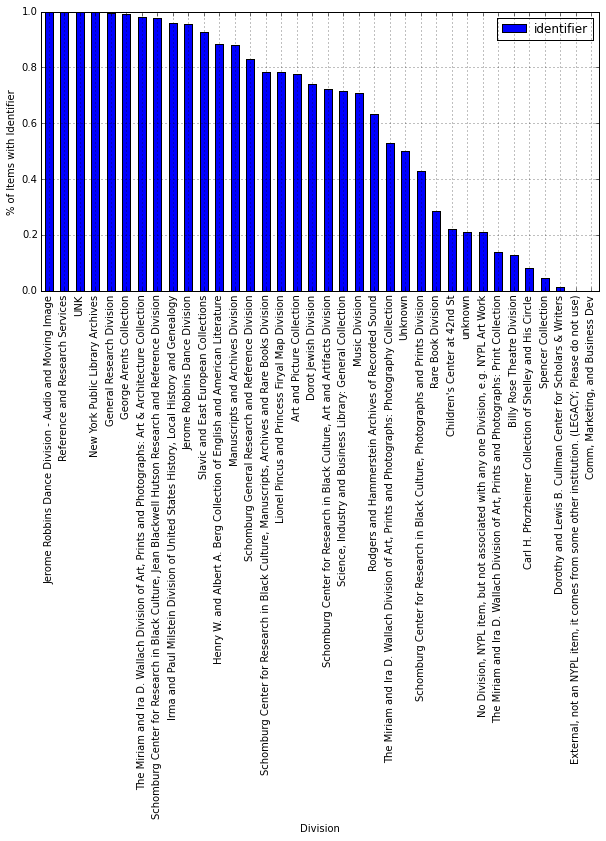

In [39]:
ids_by_division = identifiers[['identifier', 'division']].groupby('division')
mean_ids_by_division = ids_by_division.mean()
ids_plot = mean_ids_by_division.sort(columns='identifier', ascending=False).plot(kind='bar', figsize=(10,5))
ids_plot.set_xlabel('Division')
ids_plot.set_ylabel('% of Items with Identifier')

###Genre
Genre completeness (genre) is based on the composite of two factors:
- (genre_1) Record has at least 1 genre
- (genre_2) Genre terms are from an approved controlled vocabulary

In [12]:
genres = data[['mms_id', 'coll_id', 'division', 'genre_1', 'genre_2', 'genre']]
genres.mean(numeric_only=True)

mms_id     3956691.753950
coll_id      28018.914101
genre_1          0.681718
genre_2          0.657341
genre            0.669529
dtype: float64

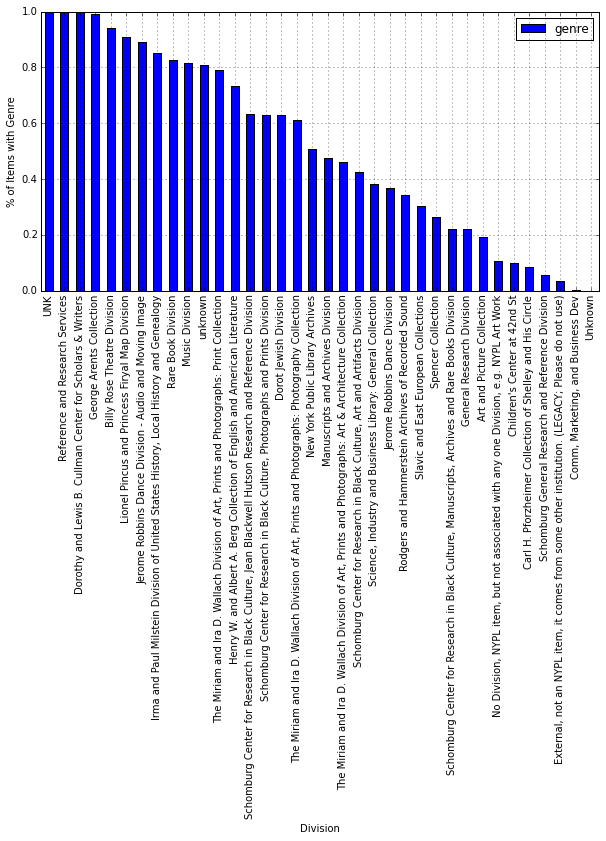

In [42]:
genre_by_division = genres[['genre', 'division']].groupby('division')
mean_genres_by_division = genre_by_division.mean()
genres_plot = mean_genres_by_division.sort(columns='genre', ascending=False).plot(kind='bar', figsize=(10,5))
genres_plot.set_xlabel('Division')
genres_plot.set_ylabel('% of Items with Genre')

###Date
Date completeness (date) is based on the composite of 4 factors:
- (date_1) Record has at least one date of type "date created," "date issued," or "copyright date."
- (date_2) At least one date is encoded to W3CDTF.
- (date_3) If there is more than one single date, each has a different date type.
- (date_4) If there is more than one date, all are single dates (not date ranges).

In [14]:
dates = data[['mms_id', 'coll_id', 'division', 'date_1', 'date_2', 'date_3', 'date_4', 'date']]
dates.mean(numeric_only=True)

mms_id     3956691.753950
coll_id      28018.914101
date_1           0.587949
date_2           0.528113
date_3           0.407405
date_4           0.533572
date             0.514260
dtype: float64

###Location
Location completeness (location) is based on the composite of 5 factors:
- (location_1) Record has a repository location.
- (location_2) Record has a division location.
- (location_3) Record has a shelf locator location.
- (location_4) If multiple division locations are present, they do not conflict.
- (location_5) All three division location types are present: long name, short name, code.


In [15]:
locations = data[['mms_id', 'coll_id', 'division', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location']]
locations.mean(numeric_only=True)

mms_id        3956691.753950
coll_id         28018.914101
location_1          0.831171
location_2          0.998924
location_3          0.807863
location_4          0.974723
location_5          0.993361
location            0.921208
dtype: float64